In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.figure import Figure
from scipy import signal
from scipy.ndimage import gaussian_filter

#Normal Condition

### Normal con 1

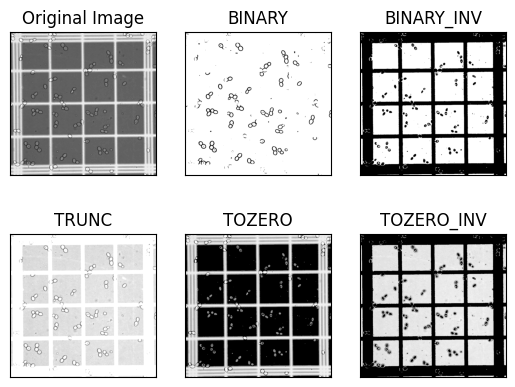

In [ ]:
img = cv2.imread("/content/normal_1_1.JPG",0)
ret,thresh1 = cv2.threshold(img,100,150,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

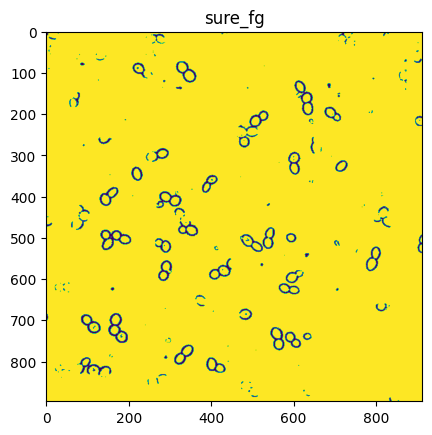

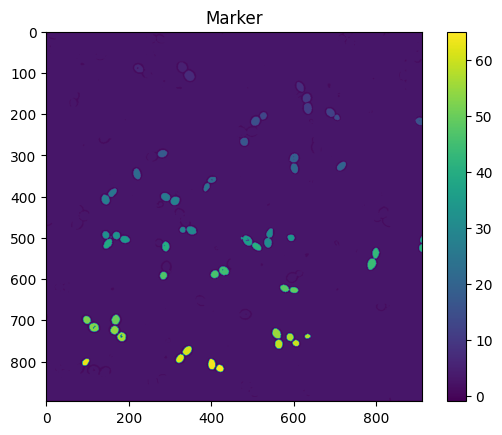

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


img = cv2.imread("/content/normal_1_1.JPG")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
ret,thresh = cv2.threshold(gray,100,150,cv2.THRESH_BINARY)


# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.001*dist_transform.max(),255,cv2.THRESH_BINARY)
plt.imshow(sure_fg);plt.title("sure_fg");plt.show()

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

#บรรทัดสุดท้าย
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0] # BGR

plt.imshow(markers);plt.colorbar();plt.title("Marker");plt.show()

In [18]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Path to the folder containing the images
folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/yeast/normal/normal_case1"

# Folder to save the processed images
save_folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/saved_normal/"
if not os.path.exists(save_folder_path):
    os.makedirs(save_folder_path)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        # Read the image
        img = cv2.imread(os.path.join(folder_path, filename))
        
        if img is not None:  # Check if the image was successfully loaded
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply thresholding
            ret, thresh = cv2.threshold(gray, 100, 150, cv2.THRESH_BINARY)
            
            # Finding sure foreground area
            dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
            ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
            
            # Convert sure_fg to uint8
            sure_fg = np.uint8(sure_fg)
            
            # Finding the unknown region
            unknown = cv2.subtract(thresh, sure_fg)
            
            # Marker labeling
            ret, markers = cv2.connectedComponents(sure_fg)
            markers = markers + 1  # Add 1 to all labels to make sure background is 1, not 0
            
            # Mark the region of unknown with zero
            markers[unknown == 255] = 0
            
            # Apply the watershed algorithm
            markers = cv2.watershed(img, markers)
            img[markers == -1] = [255, 0, 0]  # Mark the boundaries in red

            # Normalize the markers for visualization
            markers_visual = np.uint8(255 * (markers - markers.min()) / (markers.max() - markers.min()))
            ret, thresh = cv2.threshold(markers_visual, 20, 150, cv2.THRESH_BINARY)
            # Display the markers (no colorbar)
            plt.imshow(thresh, cmap='gray')
            plt.axis('off')  # Turn off the axis

            # Save the markers plot as a PNG image
            save_path = os.path.join(save_folder_path, f'markers_{os.path.splitext(filename)[0]}.png')
            plt.savefig(save_path, format='png', bbox_inches='tight', pad_inches=0)  # Save as PNG without borders
            plt.close()

        else:
            print(f"Unable to load {filename}")


### Normal Con 2

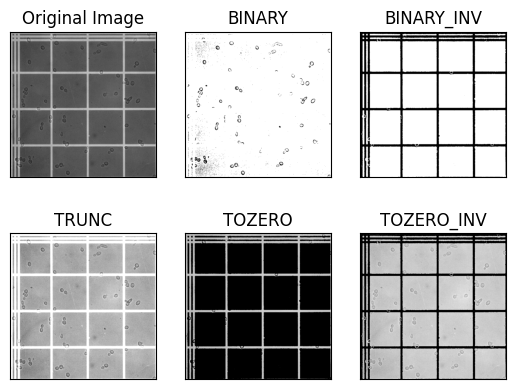

In [ ]:
img_2 = cv2.imread("/content/normal_2_12.jpg",0)
ret,thresh1 = cv2.threshold(img_2,85,150,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_2,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_2,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_2,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_2,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_2, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

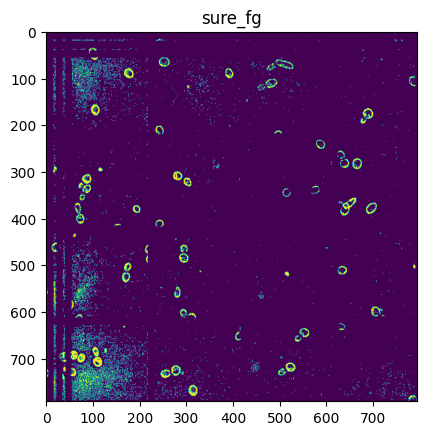

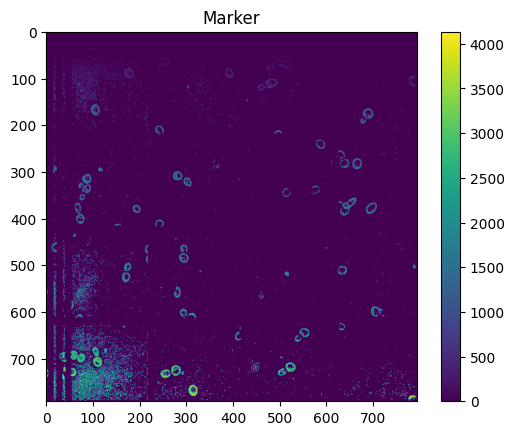

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


img = cv2.imread("/content/normal_2_12.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


ret,thresh2 = cv2.threshold(gray,89,150,cv2.THRESH_BINARY_INV)
# ret,thresh5 = cv2.threshold(gray,89,255,cv2.THRESH_TOZERO_INV)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh2,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.001*dist_transform.max(),255,cv2.THRESH_BINARY)
plt.imshow(sure_fg);plt.title("sure_fg");plt.show()

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh2,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

#บรรทัดสุดท้าย
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0] # BGR

plt.imshow(markers);plt.colorbar();plt.title("Marker");plt.show()

In [32]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Path to the folder containing the images
folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/yeast/normal/normal_case2"

# Folder to save the processed images
save_folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/saved_normal/"
if not os.path.exists(save_folder_path):
    os.makedirs(save_folder_path)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        # Read the image
        img = cv2.imread(os.path.join(folder_path, filename))
        
        if img is not None:  # Check if the image was successfully loaded
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply thresholding


            ret,thresh2 = cv2.threshold(gray,89,150,cv2.THRESH_BINARY_INV)
            # ret,thresh5 = cv2.threshold(gray,89,255,cv2.THRESH_TOZERO_INV)

            # Finding sure foreground area
            dist_transform = cv2.distanceTransform(thresh2,cv2.DIST_L2,5)
            ret, sure_fg = cv2.threshold(dist_transform,0.001*dist_transform.max(),255,cv2.THRESH_BINARY)
            
            # Convert sure_fg to uint8
            sure_fg = np.uint8(sure_fg)
            
            # Finding the unknown region
            unknown = cv2.subtract(thresh2, sure_fg)
            
            # Marker labeling
            ret, markers = cv2.connectedComponents(sure_fg)
            markers = markers + 1  # Add 1 to all labels to make sure background is 1, not 0
            
            # Mark the region of unknown with zero
            markers[unknown == 255] = 0
            
            # Apply the watershed algorithm
            markers = cv2.watershed(img, markers)
            img[markers == -1] = [255, 0, 0]  # Mark the boundaries in red

            # Normalize the markers for visualization
            markers_visual = np.uint8(255 * (markers - markers.min()) / (markers.max() - markers.min()))

            ret, thresh2 = cv2.threshold(markers_visual, 10, 150, cv2.THRESH_BINARY)
            # Display the markers (no colorbar)
            plt.imshow(thresh2, cmap='gray')
            plt.axis('off') 

            # Save the markers plot as a PNG image
            save_path = os.path.join(save_folder_path, f'markers_{os.path.splitext(filename)[0]}.png')
            plt.savefig(save_path, format='png', bbox_inches='tight', pad_inches=0)  # Save as PNG without borders
            plt.close()

        else:
            print(f"Unable to load {filename}")


### Normal Con 3

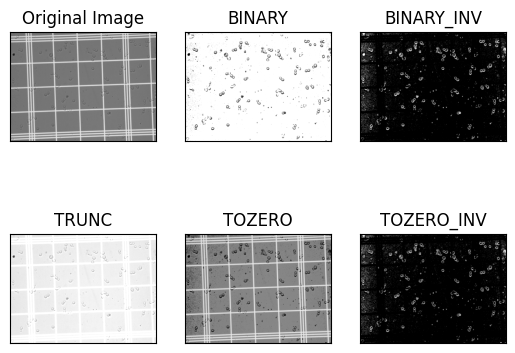

In [ ]:
img_2 = cv2.imread("/content/normal_3_Image002 (3).jpg",0)
ret,thresh1 = cv2.threshold(img_2,125,150,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_2,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_2,140,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_2,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_2,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_2, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

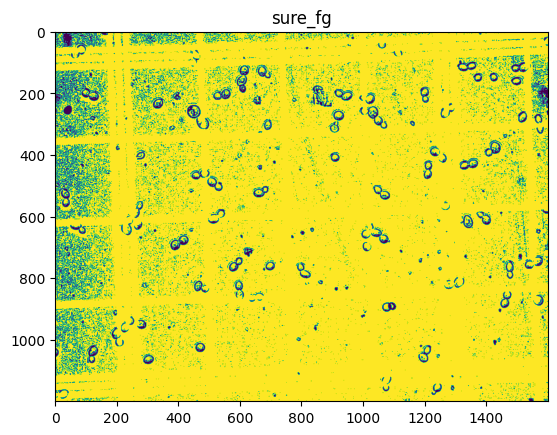

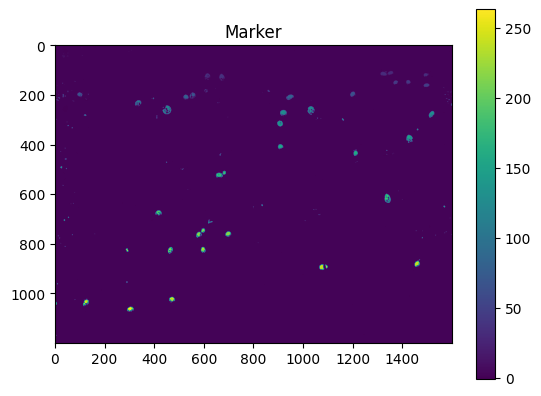

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the input image
img = cv2.imread("/content/normal_3_Image002 (3).jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
# ret, thresh = cv2.threshold(gray, 120, 150, cv2.THRESH_BINARY_INV)
ret,thresh = cv2.threshold(gray,128,150,cv2.THRESH_BINARY)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg); plt.title("sure_fg"); plt.show()

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)  # Use 'thresh2' instead of 'thresh'

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that the sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Mark boundary in red


plt.imshow(markers); plt.colorbar(); plt.title("Marker"); plt.show()


In [29]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Path to the folder containing the images
folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/yeast/normal/normal_case3"

# Folder to save the processed images
save_folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/saved_normal/"
if not os.path.exists(save_folder_path):
    os.makedirs(save_folder_path)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        # Read the image
        img = cv2.imread(os.path.join(folder_path, filename))
        
        if img is not None:  # Check if the image was successfully loaded
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply thresholding
            ret,thresh = cv2.threshold(gray,128,150,cv2.THRESH_BINARY)

            # Finding sure foreground area
            dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
            ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
                    
            # Convert sure_fg to uint8
            sure_fg = np.uint8(sure_fg)
            
            # Finding the unknown region
            unknown = cv2.subtract(thresh, sure_fg)
            
            # Marker labeling
            ret, markers = cv2.connectedComponents(sure_fg)
            markers = markers + 1  # Add 1 to all labels to make sure background is 1, not 0
            
            # Mark the region of unknown with zero
            markers[unknown == 255] = 0
            
            # Apply the watershed algorithm
            markers = cv2.watershed(img, markers)
            img[markers == -1] = [255, 0, 0]  # Mark the boundaries in red

            # Normalize the markers for visualization
            markers_visual = np.uint8(255 * (markers - markers.min()) / (markers.max() - markers.min()))

            ret, thresh = cv2.threshold(markers_visual, 10, 150, cv2.THRESH_BINARY)
            # Display the markers (no colorbar)
            
            plt.imshow(thresh, cmap='gray')
            plt.axis('off') 
            


            # Save the markers plot as a PNG image
            save_path = os.path.join(save_folder_path, f'markers_{os.path.splitext(filename)[0]}.png')
            plt.savefig(save_path, format='png', bbox_inches='tight', pad_inches=0)  # Save as PNG without borders
            plt.close()

        else:
            print(f"Unable to load {filename}")


# Flocc

### Floc 1

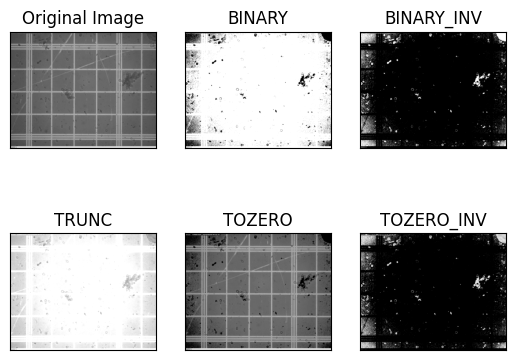

In [ ]:
img_2 = cv2.imread("/content/floc_1_14.jpg",0)
ret,thresh1 = cv2.threshold(img_2,80,150,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_2,80,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_2,100,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_2,80,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_2,80,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_2, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

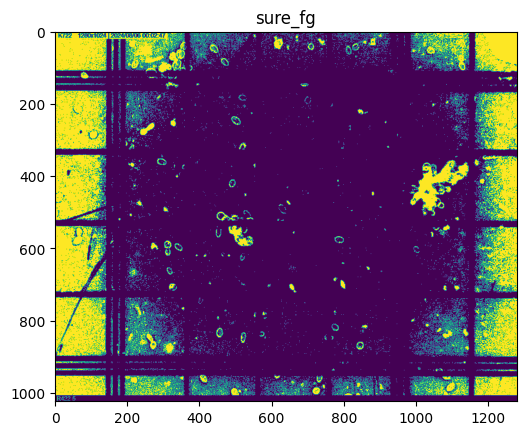

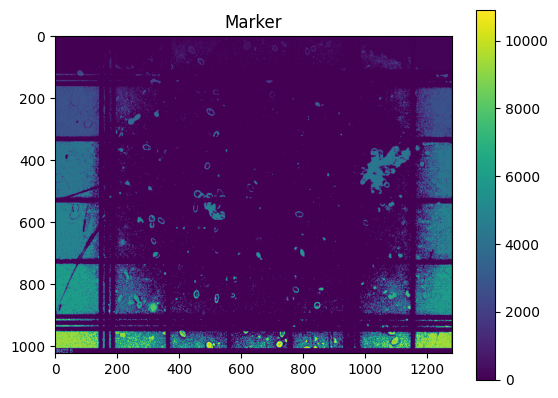

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the input image
img = cv2.imread("/content/floc_1_14.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding

# ret,thresh = cv2.threshold(gray,85,255,cv2.THRESH_BINARY_INV)
ret,thresh = cv2.threshold(gray,90,255,cv2.THRESH_TOZERO_INV)


# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg); plt.title("sure_fg"); plt.show()

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)  # Use 'thresh2' instead of 'thresh'

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that the sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Mark boundary in red


plt.imshow(markers); plt.colorbar(); plt.title("Marker"); plt.show()


In [36]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Path to the folder containing the images
folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/yeast/flocculation/floc_case1"

# Folder to save the processed images
save_folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/saved_floc/"
if not os.path.exists(save_folder_path):
    os.makedirs(save_folder_path)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        # Read the image
        img = cv2.imread(os.path.join(folder_path, filename))
        
        if img is not None:  # Check if the image was successfully loaded
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply thresholding
           # ret,thresh = cv2.threshold(gray,85,255,cv2.THRESH_BINARY_INV)
            ret,thresh = cv2.threshold(gray,90,255,cv2.THRESH_TOZERO_INV)


            # Finding sure foreground area
            dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
            ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
                                
            # Convert sure_fg to uint8
            sure_fg = np.uint8(sure_fg)
            
            # Finding the unknown region
            unknown = cv2.subtract(thresh, sure_fg)
            
            # Marker labeling
            ret, markers = cv2.connectedComponents(sure_fg)
            markers = markers + 1  # Add 1 to all labels to make sure background is 1, not 0
            
            # Mark the region of unknown with zero
            markers[unknown == 255] = 0
            
            # Apply the watershed algorithm
            markers = cv2.watershed(img, markers)
            img[markers == -1] = [255, 0, 0]  # Mark the boundaries in red

            # Normalize the markers for visualization
            markers_visual = np.uint8(255 * (markers - markers.min()) / (markers.max() - markers.min()))

            ret, thresh = cv2.threshold(markers_visual, 10, 150, cv2.THRESH_BINARY)
            # Display the markers (no colorbar)
            plt.imshow(thresh, cmap='gray')
            plt.axis('off') 

            # Save the markers plot as a PNG image
            save_path = os.path.join(save_folder_path, f'markers_{os.path.splitext(filename)[0]}.png')
            plt.savefig(save_path, format='png', bbox_inches='tight', pad_inches=0)  # Save as PNG without borders
            plt.close()

        else:
            print(f"Unable to load {filename}")


## Floc 2

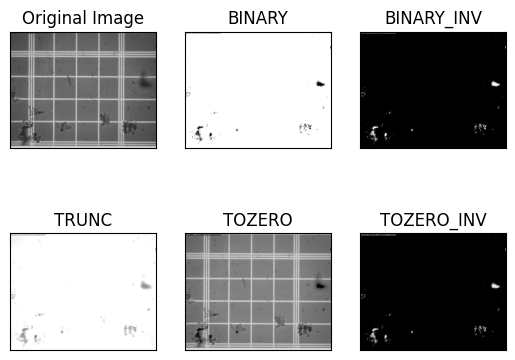

In [ ]:
img_2 = cv2.imread("/content/floc_2_1411.jpg",0)
ret,thresh1 = cv2.threshold(img_2,80,150,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_2,80,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_2,100,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_2,80,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_2,80,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_2, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the input image
img = cv2.imread("/content/floc_2_1411.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
# ret,thresh = cv2.threshold(gray,115,255,cv2.THRESH_BINARY_INV)

ret,thresh = cv2.threshold(gray,100,255,cv2.THRESH_TOZERO_INV)



# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg); plt.title("sure_fg"); plt.show()

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)  # Use 'thresh2' instead of 'thresh'

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that the sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Mark boundary in red


plt.imshow(markers); plt.colorbar(); plt.title("Marker"); plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [42]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Path to the folder containing the images
folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/yeast/flocculation/floc_case2"

# Folder to save the processed images
save_folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/saved_floc/"
if not os.path.exists(save_folder_path):
    os.makedirs(save_folder_path)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        # Read the image
        img = cv2.imread(os.path.join(folder_path, filename))
        
        if img is not None:  # Check if the image was successfully loaded
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply thresholding
           # ret,thresh = cv2.threshold(gray,85,255,cv2.THRESH_BINARY_INV)
            ret,thresh = cv2.threshold(gray,100,255,cv2.THRESH_TOZERO_INV)



# Finding sure foreground area
            dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
            ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
                                
            # Convert sure_fg to uint8
            sure_fg = np.uint8(sure_fg)
            
            # Finding the unknown region
            unknown = cv2.subtract(thresh, sure_fg)
            
            # Marker labeling
            ret, markers = cv2.connectedComponents(sure_fg)
            markers = markers + 1  # Add 1 to all labels to make sure background is 1, not 0
            
            # Mark the region of unknown with zero
            markers[unknown == 255] = 0
            
            # Apply the watershed algorithm
            markers = cv2.watershed(img, markers)
            img[markers == -1] = [255, 0, 0]  # Mark the boundaries in red

            # Normalize the markers for visualization
            markers_visual = np.uint8(255 * (markers - markers.min()) / (markers.max() - markers.min()))

            ret, thresh = cv2.threshold(markers_visual, 20, 150, cv2.THRESH_BINARY)
            # Display the markers (no colorbar)
            plt.imshow(thresh, cmap='gray')
            plt.axis('off') 

            # Save the markers plot as a PNG image
            save_path = os.path.join(save_folder_path, f'markers_{os.path.splitext(filename)[0]}.png')
            plt.savefig(save_path, format='png', bbox_inches='tight', pad_inches=0)  # Save as PNG without borders
            plt.close()

        else:
            print(f"Unable to load {filename}")


# typeL

### typeL 1

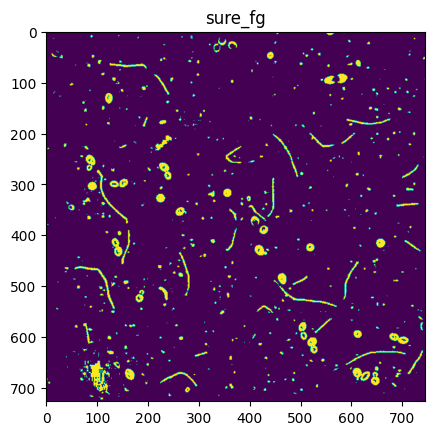

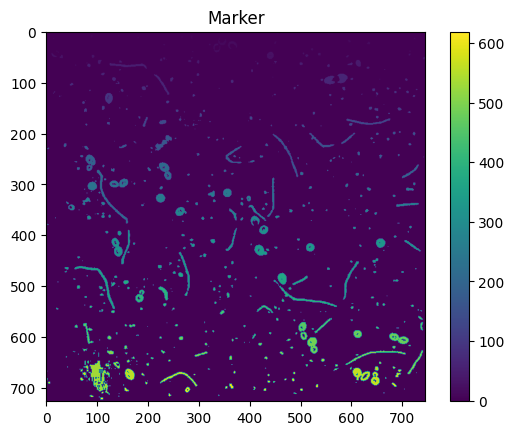

In [27]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the input image
img = cv2.imread("/content/12_0.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
ret,thresh = cv2.threshold(gray,115,255,cv2.THRESH_TOZERO_INV)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg); plt.title("sure_fg"); plt.show()

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)  # Use 'thresh2' instead of 'thresh'

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that the sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Mark boundary in red


plt.imshow(markers); plt.colorbar(); plt.title("Marker"); plt.show()


In [43]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Path to the folder containing the images
folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/yeast/type L/typeL_case1"

# Folder to save the processed images
save_folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/saved_typel/"
if not os.path.exists(save_folder_path):
    os.makedirs(save_folder_path)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        # Read the image
        img = cv2.imread(os.path.join(folder_path, filename))
        
        if img is not None:  # Check if the image was successfully loaded
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply thresholding
           # ret,thresh = cv2.threshold(gray,85,255,cv2.THRESH_BINARY_INV)
            ret,thresh = cv2.threshold(gray,115,255,cv2.THRESH_TOZERO_INV)

# Finding sure foreground area
            dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
            ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
                                            
            # Convert sure_fg to uint8
            sure_fg = np.uint8(sure_fg)
            
            # Finding the unknown region
            unknown = cv2.subtract(thresh, sure_fg)
            
            # Marker labeling
            ret, markers = cv2.connectedComponents(sure_fg)
            markers = markers + 1  # Add 1 to all labels to make sure background is 1, not 0
            
            # Mark the region of unknown with zero
            markers[unknown == 255] = 0
            
            # Apply the watershed algorithm
            markers = cv2.watershed(img, markers)
            img[markers == -1] = [255, 0, 0]  # Mark the boundaries in red

            # Normalize the markers for visualization
            markers_visual = np.uint8(255 * (markers - markers.min()) / (markers.max() - markers.min()))

            ret, thresh = cv2.threshold(markers_visual, 10, 150, cv2.THRESH_BINARY)
            # Display the markers (no colorbar)
            plt.imshow(thresh, cmap='gray')
            plt.axis('off') 

            # Save the markers plot as a PNG image
            save_path = os.path.join(save_folder_path, f'markers_{os.path.splitext(filename)[0]}.png')
            plt.savefig(save_path, format='png', bbox_inches='tight', pad_inches=0)  # Save as PNG without borders
            plt.close()

        else:
            print(f"Unable to load {filename}")


### type l2

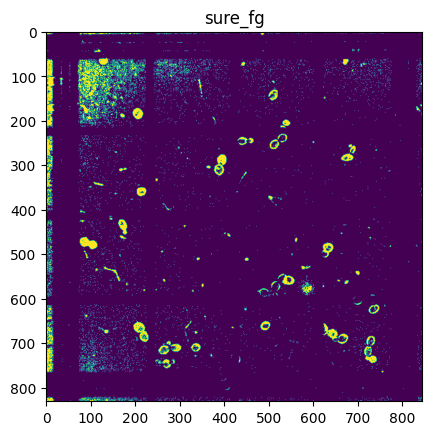

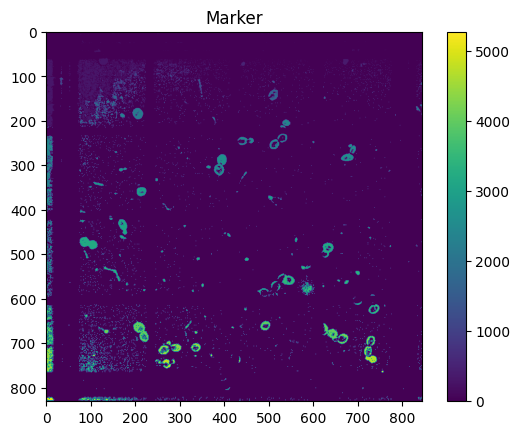

In [75]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read the input image
img = cv2.imread("/content/R422 01-00 130467 5.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
# ret,thresh = cv2.threshold(gray,110,255,cv2.THRESH_TOZERO_INV)
ret,thresh = cv2.threshold(gray,110,255,cv2.THRESH_BINARY_INV)



# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg); plt.title("sure_fg"); plt.show()

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)  # Use 'thresh2' instead of 'thresh'

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that the sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Mark boundary in red


plt.imshow(markers); plt.colorbar(); plt.title("Marker"); plt.show()


In [44]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Path to the folder containing the images
folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/yeast/type L/typeL_case2"

# Folder to save the processed images
save_folder_path = "/Users/nunny/Desktop/mitrphol-ai-hackathon/saved_typel/"
if not os.path.exists(save_folder_path):
    os.makedirs(save_folder_path)

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".JPG") or filename.endswith(".jpg"):
        # Read the image
        img = cv2.imread(os.path.join(folder_path, filename))
        
        if img is not None:  # Check if the image was successfully loaded
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply thresholding
           # ret,thresh = cv2.threshold(gray,85,255,cv2.THRESH_BINARY_INV)
            ret,thresh = cv2.threshold(gray,110,255,cv2.THRESH_BINARY_INV)



            # Finding sure foreground area
            dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
            ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, cv2.THRESH_BINARY)
                                            
            # Convert sure_fg to uint8
            sure_fg = np.uint8(sure_fg)
            
            # Finding the unknown region
            unknown = cv2.subtract(thresh, sure_fg)
            
            # Marker labeling
            ret, markers = cv2.connectedComponents(sure_fg)
            markers = markers + 1  # Add 1 to all labels to make sure background is 1, not 0
            
            # Mark the region of unknown with zero
            markers[unknown == 255] = 0
            
            # Apply the watershed algorithm
            markers = cv2.watershed(img, markers)
            img[markers == -1] = [255, 0, 0]  # Mark the boundaries in red

            # Normalize the markers for visualization
            markers_visual = np.uint8(255 * (markers - markers.min()) / (markers.max() - markers.min()))

            ret, thresh = cv2.threshold(markers_visual, 10, 150, cv2.THRESH_BINARY)
            # Display the markers (no colorbar)
            plt.imshow(thresh, cmap='gray')
            plt.axis('off') 

            # Save the markers plot as a PNG image
            save_path = os.path.join(save_folder_path, f'markers_{os.path.splitext(filename)[0]}.png')
            plt.savefig(save_path, format='png', bbox_inches='tight', pad_inches=0)  # Save as PNG without borders
            plt.close()

        else:
            print(f"Unable to load {filename}")
